In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import cvlib as cv
import matplotlib.pyplot as plt

In [2]:
# loading model & preparing data
model = load_model('gender_detection.model')
classes = ['Man / Ferfi','Woman / noi']
fce = cv2.imread('test_multi.jpg')
#fce = cv2.cvtColor(fce,cv2.COLOR_BGR2RGB)
face, confidence = cv.detect_face(fce)
#plt.imshow(fce)

In [3]:
for idx, f in enumerate(face):
 
        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]
        
        
        # draw rectangle over face       
        cv2.rectangle(fce, (startX,startY), (endX,endY), (0,0,255), 2)
        
        # crop the detected face region
        face_crop = np.copy(fce[startY:endY,startX:endX])
        
        #plt.imshow(face_crop)
        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue
            
            
        # pre-processing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        #plt.imshow(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)
        
        # applying model 
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]
        
        
        #print(conf)
        
        # getting label
        idx = np.argmax(conf)
        label = classes[idx]
        
        print(label)
        label = "{}".format(label)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # processing output
        result = cv2.putText(fce, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    1.0, (0, 0, 255), 3)


Man / Ferfi
Man / Ferfi


0.9999704

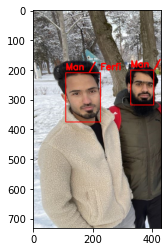

In [4]:
result_p = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(result_p)
conf[idx]